In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O105

06/14/2018  12:42 PM    <DIR>          .
06/14/2018  12:42 PM    <DIR>          ..
06/13/2018  03:03 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/14/2018  12:42 PM           571,806 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/13/2018  04:27 AM        12,590,826 vasprun.xml
               4 File(s)     13,540,923 bytes
               3 Dir(s)  172,791,631,872 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.7413, -16.7272, -16.6885, ..., -16.8087, -16.8753, -16.8989],
        [-16.0006, -16.0204, -16.0746, ..., -16.016 , -15.9441, -15.918 ],
        [ -4.5272,  -4.5098,  -4.4662, ...,  -4.6263,  -4.6836,  -4.7038],
        ..., 
        [ 25.6978,  25.9056,  26.5261, ...,  29.8746,  30.6339,  31.0818],
        [ 30.6109,  29.8831,  28.287 , ...,  31.0608,  30.6936,  32.8279],
        [ 30.6111,  29.8832,  28.287 , ...,  31.1685,  30.8312,  32.8415]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([-1.6169, -1.5892, -1.5296, -1.4732, -1.4589, -1.4893, -1.5375,
       -1.5765, -1.5629, -1.4851, -1.4851, -1.6469, -1.6677, -1.6242,
       -1.5619, -1.4868, -1.3769, -1.269 , -1.2217, -1.236 , -1.236 ,
       -1.2238, -1.2408, -1.2671, -1.2993, -1.3341, -1.3685, -1.4005,
       -1.4281, -1.4502, -1.4502, -1.4732, -1.4522, -1.3942, -1.3954,
       -1.4729, -1.5616, -1.6326, -1.6419, -1.4851])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =  -1.6169
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =  -1.5892
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =  -1.5296
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =  -1.4732
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =  -1.4589
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =  -1.4893
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =  -1.5375
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =  -1.5765
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =  -1.5629
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =  -1.4851
...


In [13]:
bsplot = BSPlotter(bs)

2.585


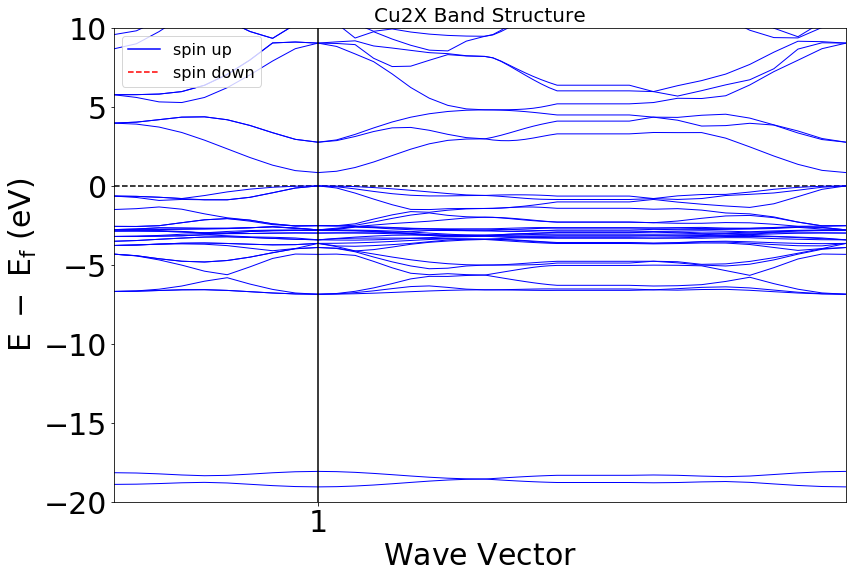

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.7740
  0.1430  -3.7463
  0.2860  -3.6867
  0.4290  -3.6303
  0.5720  -3.6160
  0.7149  -3.6464
  0.8579  -3.6946
  1.0009  -3.7336
  1.1439  -3.7200
  1.2869  -3.6422
--------------------
  1.2869  -3.6422
  1.4036  -3.8040
  1.5204  -3.8248
  1.6371  -3.7813
  1.7539  -3.7190
  1.8706  -3.6439
  1.9874  -3.5340
  2.1041  -3.4261
  2.2209  -3.3788
  2.3376  -3.3931
  2.3376  -3.3931
  2.3882  -3.3809
  2.4388  -3.3979
  2.4893  -3.4242
  2.5399  -3.4564
  2.5904  -3.4912
  2.6410  -3.5256
  2.6915  -3.5576
  2.7421  -3.5852
  2.7926  -3.6073
  3.2476  -3.6073
  3.3993  -3.6303
  3.5509  -3.6093
  3.7026  -3.5513
  3.8543  -3.5525
  4.0059  -3.6300
  4.1576  -3.7187
  4.3093  -3.7897
  4.4609  -3.7990
  4.6126  -3.6422


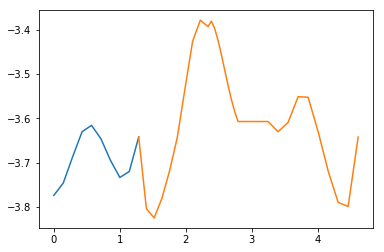

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

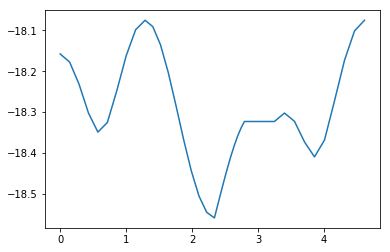

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

2.585
2.585


C:\Users\Owner\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\Owner\Documents\Python Scripts\Otest\O105
  " was found in {}".format(os.path.abspath(p)))


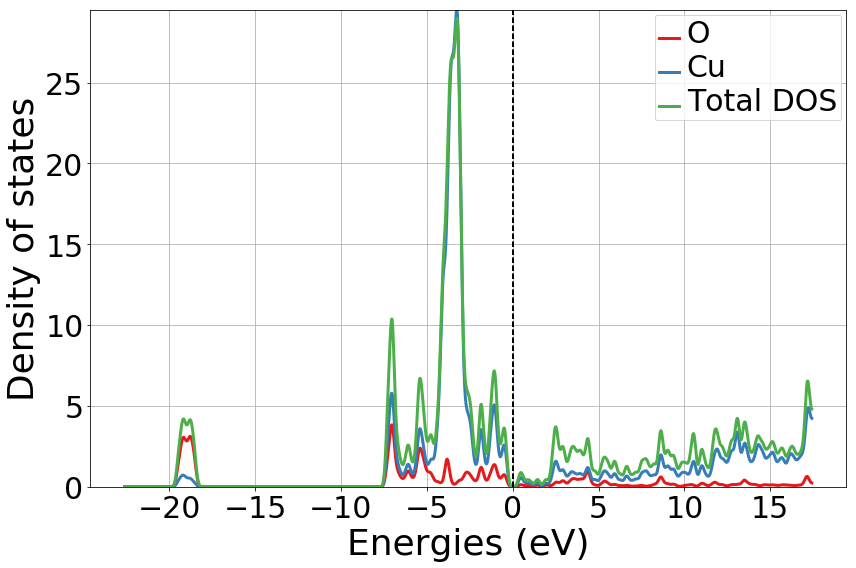

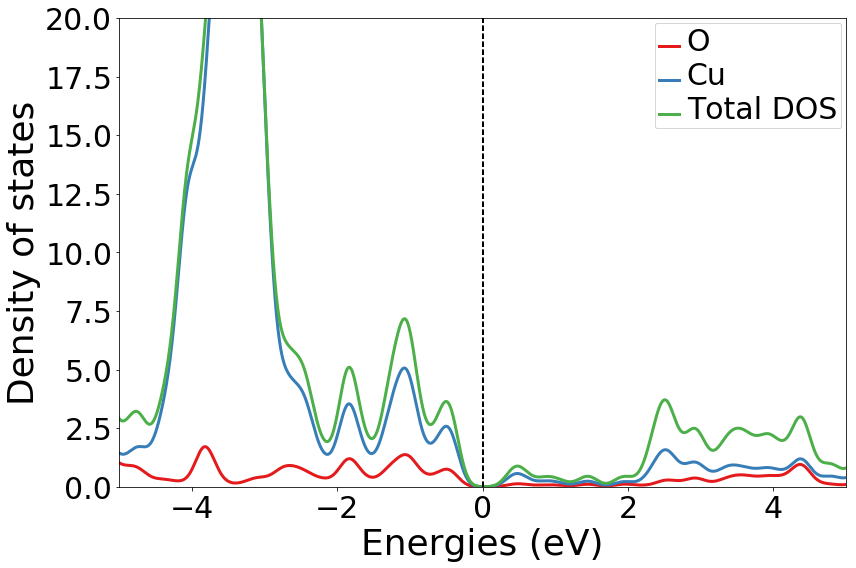

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

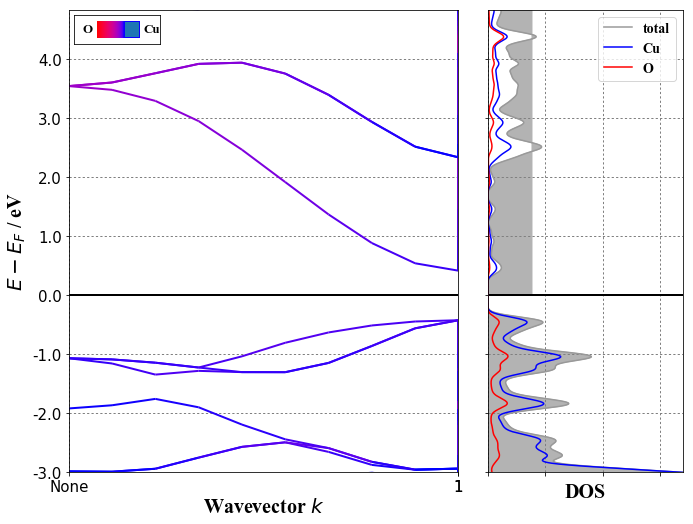

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

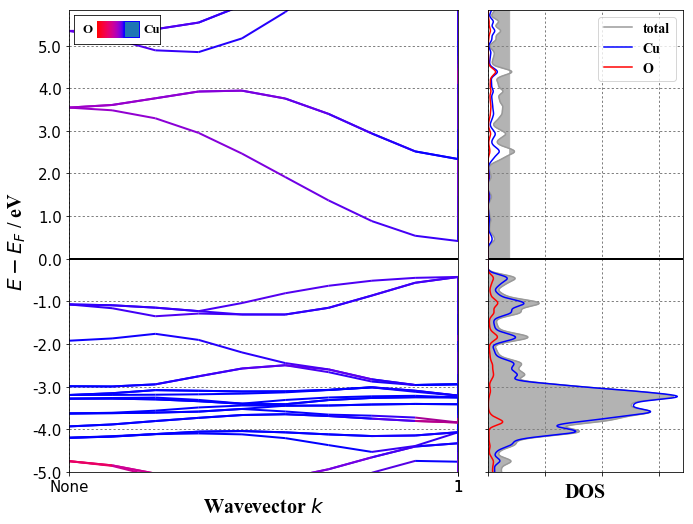

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)